### 데이터 불러오기

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 보험 청구/지급 데이터 + 보험 사전 건강 검진 데이터 병합.
# 보험 청구 지급 데이터에 있는 고객들의 정보이므로 사전 건강 검진에서 가입이 거절된 사람들은 포함되어 있지 않음. 
# 결론적으로 보험 가입이 되어 있는 사람들의 정보만 존재.
data = pd.read_excel("insu_request+review.xlsx")

In [5]:
data

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,...,new_bt_mch_judge,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49445,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49446,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49447,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 데이터 셋에 4546명이 존재.
a = set(data['customer_id'])
a = list(a)
len(a)

4546

In [7]:
# 지급 없는 고객 52명 존재.
null_customer = data[data['insu_pay_amount'].isnull()]['customer_id']
null_customer_list = list(null_customer)
len(null_customer_list)

52

In [8]:
null_customer_index = data[data['customer_id'].isin(['C113058',
 'C113295',
 'C113511',
 'C113724',
 'C113953',
 'C113954',
 'C114408',
 'C114449',
 'C115129',
 'C115391',
 'C116121',
 'C116146',
 'C116190',
 'C117231',
 'C118360',
 'C119320',
 'C119445',
 'C120561',
 'C120894',
 'C121089',
 'C121171',
 'C122495',
 'C122512',
 'C123169',
 'C123247',
 'C123496',
 'C123703',
 'C123754',
 'C124540',
 'C124566',
 'C125686',
 'C125854',
 'C126103',
 'C126280',
 'C126591',
 'C126783',
 'C127944',
 'C128053',
 'C128098',
 'C128473',
 'C129116',
 'C129362',
 'C129429',
 'C129720',
 'C129833',
 'C130031',
 'C130300',
 'C130325',
 'C131999',
 'C132469',
 'C133322',
 'C133340'])].index

In [9]:
req_rev = data.drop(null_customer_index)
req_rev

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,...,new_bt_mch_judge,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49445,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49446,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49447,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 데이터 셋에 4546명이 존재.
b = set(req_rev['customer_id'])
b = list(b)
len(b)

4494

### 데이터셋 생성

In [11]:
# 최대 누적 납입액 
max_insu_cum_amount = pd.pivot_table(req_rev, index=['customer_id'],
                             values=['insu_cum_amount'],
                             aggfunc=['max'])
max_insu_cum_amount

,max
,insu_cum_amount
customer_id,
C112379,1800000
C112404,600000
C112411,240000
C112570,4875000
C112727,3250000
...,...
C134197,4000000
C134221,3600000


In [12]:
# 청구별 지급액
# 보험 지급액은 건별 합산 금액이므로, 청구 번호별 지급액으로 구해야 한다.
per_req_pay = pd.pivot_table(req_rev, index=['customer_id','req_id'],
                   values=['insu_pay_amount'])
per_req_pay

insu_pay_amount
customer_id req_id                                        
C112379     C112379-20101118-12660-01-001         724498.0
            C112379-20110314-17403-01-001         490079.0
C112404     C112404-20100831-12754-01-001        1008750.0
C112411     C112411-20101111-18755-01-001         553680.0
C112570     C112570-20100730-10580-01-001         412210.0
...                                                    ...
C134250     C134250-20110420-10774-02-001          65200.0
            C134250-20110519-11464-01-001         444582.0
            C134250-20130509-17069-01-001        2756990.0
            C134250-20130607-14972-01-001         140900.0
C134251     C134251-20110630-13303-01-001         111570.0

[18965 rows x 1 columns]

In [13]:
# 지급액 총액
sum_insu_pay_amount = pd.pivot_table(per_req_pay, index=['customer_id'],
                   values=['insu_pay_amount'],
                   aggfunc=['sum'])
sum_insu_pay_amount

,sum
,insu_pay_amount
customer_id,
C112379,1214577.0
C112404,1008750.0
C112411,553680.0
C112570,2852279.0
C112727,201880.0
...,...
C134197,1901048.0
C134221,9951053.0


In [14]:
final = pd.merge(max_insu_cum_amount, sum_insu_pay_amount, on='customer_id')
final

,max,sum
,insu_cum_amount,insu_pay_amount
customer_id,,
C112379,1800000,1214577.0
C112404,600000,1008750.0
C112411,240000,553680.0
C112570,4875000,2852279.0
C112727,3250000,201880.0
...,...,...
C134197,4000000,1901048.0
C134221,3600000,9951053.0


In [15]:
final.to_excel('납입-지급만.xlsx')

In [167]:
# 납입 - 지급으로 수익성 변수 생성
final = final['max']['insu_cum_amount']-final['sum']['insu_pay_amount']
final = final.to_frame()
final = final.rename({0:'profit'},axis='columns')
final = final.reset_index()
final

,customer_id,profit
0,C112379,585423.0
1,C112404,-408750.0
2,C112411,-313680.0
3,C112570,2022721.0
4,C112727,3048120.0
...,...,...
4489,C134197,2098952.0
4490,C134221,-6351053.0
4491,C134227,837972.0
4492,C134250,-1757672.0


In [168]:
# 납입 - 지급 <= 5만원
final[final['profit']>=50000]

,customer_id,profit
0,C112379,585423.0
3,C112570,2022721.0
4,C112727,3048120.0
5,C112730,1099094.0
6,C112742,108690.0
...,...,...
4486,C134184,7137990.0
4487,C134186,7610200.0
4489,C134197,2098952.0
4491,C134227,837972.0


In [169]:
# 납입 - 지급 > 5만원
final[final['profit']<50000]

,customer_id,profit
1,C112404,-408750.0
2,C112411,-313680.0
13,C112911,-774133.0
20,C112941,-898703.0
21,C112953,-1757964.0
...,...,...
4448,C133978,-972424.0
4471,C134107,-515322.0
4488,C134188,-4993139.0
4490,C134221,-6351053.0


In [170]:
# final과 req_rev 붙여서 최종 데이터 프레임 만들기
real_final = pd.merge(final, req_rev, how='left', on='customer_id')
real_final = real_final.drop_duplicates(['customer_id'])
real_final = real_final.reset_index(drop=True)

In [171]:
real_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 70 columns):
customer_id              4494 non-null object
profit                   4494 non-null float64
review_cat               4494 non-null object
judge                    4494 non-null object
gender                   4494 non-null int64
age                      4494 non-null int64
insu_id                  4494 non-null object
insu_contract_date       4494 non-null object
insu_prod_id             4494 non-null object
insu_prod_name           4494 non-null object
req_id                   4494 non-null object
req_id_seq               4494 non-null int64
sick_main                4494 non-null object
sick_1st                 4494 non-null object
sick_2nd                 936 non-null object
sick_3rd                 368 non-null object
dg_cat                   4494 non-null object
dg_start_date            4494 non-null object
dg_end_date              4494 non-null object
dg_duration            

In [172]:
real_final

,customer_id,profit,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,...,new_bt_mch_judge,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge
0,C112379,585423.0,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
1,C112404,-408750.0,혈액검사,재검,1,69,INS-10371,28-Mar-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0
2,C112411,-313680.0,일반검진,재검,1,69,INS-10266,19-Sep-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112570,2022721.0,일반검진,재검,1,67,INS-17614,26-May-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C112727,3048120.0,일반검진,승인,1,65,INS-17707,23-Jun-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,C134197,2098952.0,혈액검사,재검,1,42,INS-13759,22-Dec-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
4490,C134221,-6351053.0,혈액검사,재검,2,51,INS-14269,08-Sep-15,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4491,C134227,837972.0,혈액검사,재검,2,45,INS-13466,24-Nov-14,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
4492,C134250,-1757672.0,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x241ceee0ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x241cefc4b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x241d0161088>],
 'medians': [<matplotlib.lines.Line2D at 0x241cc8d8dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x241cf0325c8>],
 'means': []}

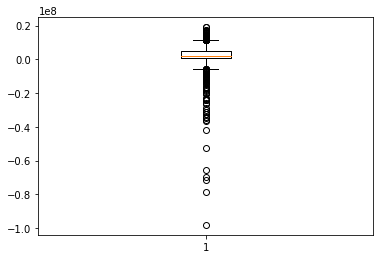

In [173]:
plt.boxplot(real_final['profit'])

In [177]:
real_final['profit'].median()

2183405.0

In [185]:
real_final['risk'] = np.where(real_final['profit']>=50000,0,1)

In [186]:
real_final

,customer_id,profit,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
0,C112379,585423.0,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0
1,C112404,-408750.0,혈액검사,재검,1,69,INS-10371,28-Mar-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1
2,C112411,-313680.0,일반검진,재검,1,69,INS-10266,19-Sep-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,C112570,2022721.0,일반검진,재검,1,67,INS-17614,26-May-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,C112727,3048120.0,일반검진,승인,1,65,INS-17707,23-Jun-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,C134197,2098952.0,혈액검사,재검,1,42,INS-13759,22-Dec-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0
4490,C134221,-6351053.0,혈액검사,재검,2,51,INS-14269,08-Sep-15,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4491,C134227,837972.0,혈액검사,재검,2,45,INS-13466,24-Nov-14,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0
4492,C134250,-1757672.0,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [187]:
# add_profit으로 저장.
real_final.to_excel('add_profit.xlsx')